<a href="https://colab.research.google.com/github/nahsiNgmT/Research/blob/main/LSTM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/nahsiNgmT/Research

fatal: destination path 'Research' already exists and is not an empty directory.


In [2]:
%cd Research/data/

/content/Research/data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, InputLayer

In [4]:
# Load dataset
data = pd.read_csv('data.csv')

In [5]:
data[-10:]

,Displacement,Label
19994,0.043842,0
19995,0.043784,0
19996,0.043725,0
19997,0.043669,0
19998,0.043616,0
19999,0.043563,0
20000,0.043512,0
20001,0.043461,0
20002,0.043412,0
20003,0.043364,0


In [6]:
displacement = data['Displacement'].values
status = data['Label'].values

<Axes: xlabel='Label', ylabel='count'>

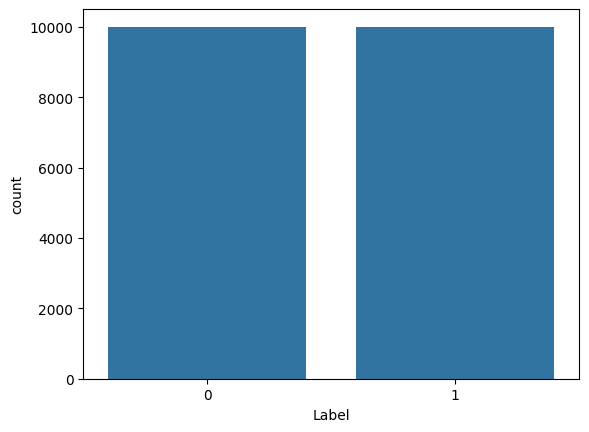

In [7]:
sns.countplot(x='Label', data=data)

In [8]:
scaler = MinMaxScaler()
displacement = scaler.fit_transform(displacement.reshape(-1,1))

In [9]:
def Generate_dataset(X_data, y_data, window_size):
  # Prepare sequences for LSTM
  X, y = [], []
  for i in range(len(X_data) - window_size):
      X.append(X_data[i:i + window_size])  # Extract sequence
      y.append(y_data[i + window_size])  # Label for sequence

  X = np.array(X)
  y = np.array(y)

  return X, y


In [10]:
window_size = 50
X , y = Generate_dataset(displacement, status, window_size)
print(X.shape)
print(y.shape)

(19954, 50, 1)
(19954,)


In [11]:
# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=False)


In [12]:
test_data = pd.read_csv('test_data_1.csv')

In [13]:
test_data

,Displacement,Label
0,0.000000,1
1,0.000003,1
2,0.000012,1
3,0.000028,1
4,0.000051,1
...,...,...
4996,59.082363,1
4997,59.105892,1
4998,59.129438,1
4999,59.153001,1


In [14]:
test_displacement = test_data['Displacement'].values
test_status = test_data['Label'].values

In [15]:
test_displacement = scaler.transform(test_displacement.reshape(-1,1))

In [16]:
window_size = 50
X_test , y_test = Generate_dataset(test_displacement, test_status, window_size)
print(X_test.shape)
print(y_test.shape)

(4951, 50, 1)
(4951,)


In [17]:
# LSTM model
model = Sequential()
model.add(InputLayer(input_shape=(window_size, 1)))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10
)

Epoch 1/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.8160 - loss: 0.3725 - val_accuracy: 1.0000 - val_loss: 0.2015
Epoch 2/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.8986 - loss: 0.2681 - val_accuracy: 1.0000 - val_loss: 0.2838
Epoch 3/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.7759 - loss: 0.4558 - val_accuracy: 1.0000 - val_loss: 0.2731
Epoch 4/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8368 - loss: 0.4503 - val_accuracy: 1.0000 - val_loss: 0.2972
Epoch 5/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8532 - loss: 0.3129 - val_accuracy: 1.0000 - val_loss: 0.4443
Epoch 6/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8687 - loss: 0.3190 - val_accuracy: 1.0000 - val_loss: 0.2551
Epoch 7/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9010 - loss: 0.2510 - val_accuracy: 1.0000 - val_loss: 0.1661
Epoch 8/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9363 - loss: 0.1863 - 

In [19]:
predictions = model.predict(X_test)

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


In [20]:
predictions[-10:]

array([[0.99862665],
       [0.9986107 ],
       [0.99859446],
       [0.9985781 ],
       [0.9985615 ],
       [0.9985447 ],
       [0.99852765],
       [0.9985104 ],
       [0.9984929 ],
       [0.9984752 ]], dtype=float32)

In [21]:
y_test[-10:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
test_data_2 = pd.read_csv('test_data_2.csv')
test_displacement_2 = test_data_2['Displacement'].values
test_status_2 = test_data_2['Label'].values
test_displacement_2 = scaler.transform(test_displacement_2.reshape(-1,1))
window_size = 50
X_test_2 , y_test_2 = Generate_dataset(test_displacement_2, test_status_2, window_size)
print(X_test_2.shape)
print(y_test_2.shape)

(4951, 50, 1)
(4951,)


In [23]:
predictions_2 = model.predict(X_test_2)

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [32]:
predictions_2[:-10]

array([[0.35243827],
       [0.3525275 ],
       [0.35262042],
       ...,
       [0.38674924],
       [0.38671497],
       [0.38667956]], dtype=float32)

In [33]:
y_test_2[:-10]

array([0, 0, 0, ..., 0, 0, 0])